Clustering: K-Means
Dataset: Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data Transformation....) techniques
if necessary.
Apply K-Means clustering algorithms (based on total_graduates) to find the group
of customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('/content/cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [6]:
df.columns

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')

In [7]:
df.shape

(493, 22)

In [9]:
df.isna().sum().sum()

0

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df = pd.read_csv('/content/cities_r2.csv')
df['name_of_city'] = lb.fit_transform(df['name_of_city'])
df['state_name'] = lb.fit_transform(df['state_name'])
df['location'] = lb.fit_transform(df['location'])
df.dtypes

name_of_city                        int64
state_code                          int64
state_name                          int64
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                            int64
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [13]:
cluster = []
for i in range(1, 11):
  m = KMeans(n_clusters=i).fit(df)
  cluster.append(m.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

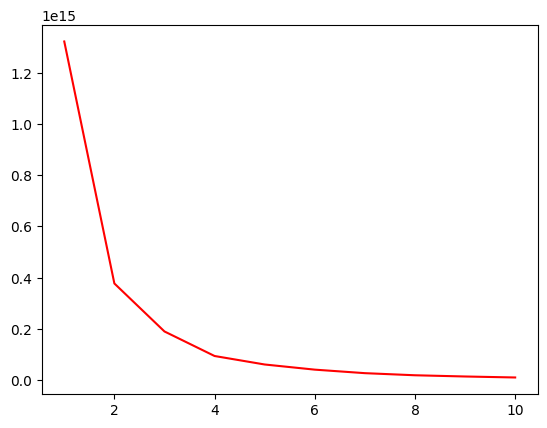

In [14]:
plt.plot(range(1, 11), cluster, c="red")
plt.show()

In [15]:
model = KMeans(n_clusters=3).fit(df)
df['labels'] = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


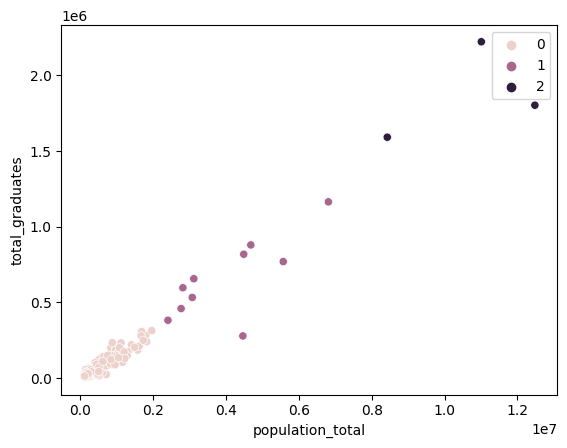

In [20]:
import seaborn as sns
sns.scatterplot(y=df['total_graduates'], x=df['population_total'], hue=df['labels'])
plt.legend()
plt.show()